# Descripció

Familiaritza't amb la Programació Numèrica a través de la llibreria NumPy. 

## <span style='color:Blue'>Nivell 1</span>

### Exercici 1

Crea una funció que donat un Array d’una dimensió, et faci un resum estadístic bàsic de les dades. Si detecta que l’array té més d’una dimensió, ha de mostrar un missatge d’error.

In [10]:
import numpy as np

def resumEstadistic(arr):
    if arr.ndim > 1:
        print("Error: aquesta funció només admet numpy arrays d'una dimensió.", end = "\n")
        print("-" * 80)
        return
    print("Numpy array:", arr)
    print()
    print("La suma dels valors és", np.sum(arr))
    print()
    print("La mitja dels valors és:", np.mean(arr), end = "\n")
    print()
    print("El valor mínim és", np.min(arr))    
    print("El primer quartil és:", np.percentile(arr, 25))
    print("La mitjana dels valors és:", np.median(arr), end = "\n")
    print("El tercer quartil és:", np.percentile(arr, 75))
    print("El valor màxim és", np.max(arr))
    print()
    print("La desviació estàndar és:", np.std(arr), end = "\n")
    
    
# Referència:
# https://manualestutor.com/programacion/numpy-al-descubierto-una-guia-para-principiantes-sobre-estadisticas-con-numpy/
 


In [11]:
# nparray que donarà error perquè té més d'una dimensió
arr2D = np.array([[1,2,3,4,5], [6,7,8,9,10]])
resumEstadistic(arr2D)

Error: aquesta funció només admet numpy arrays d'una dimensió.
--------------------------------------------------------------------------------


In [12]:
# nparray correcte, cas 1
arr1D = np.array([1, 2, 3, 4, 5, 20])
resumEstadistic(arr1D)

Numpy array: [ 1  2  3  4  5 20]

La suma dels valors és 35

La mitja dels valors és: 5.833333333333333

El valor mínim és 1
El primer quartil és: 2.25
La mitjana dels valors és: 3.5
El tercer quartil és: 4.75
El valor màxim és 20

La desviació estàndar és: 6.465721580423608


### Exercici 2

Crea una funció que et generi un quadrat NxN de nombres aleatoris entre el 0 i el 100.

In [13]:
# Nota: per l'enunciat no queda clar si el 100 ha d'estar inclòs o no.
# Suposarem que SÍ.

In [14]:
def quadratNxN(n):
    return np.random.randint(101, size=(n, n))

n = 5
print("Array ", n, "x", n)
print(quadratNxN(5))
print("-" * 20)
n = 2
print("Array ", n, "x", n)
print(quadratNxN(2))

Array  5 x 5
[[81 77 53 56 15]
 [52 10 75 16 69]
 [35 34 16 19 86]
 [71 78 56 84 38]
 [48 63 70 31 40]]
--------------------
Array  2 x 2
[[ 1 59]
 [82  2]]


### Exercici 3

Crea una funció que donada una taula de dues dimensions, et calculi els totals per fila i els totals per columna. 

In [15]:
def sumRowsColumns(arr):
    print("La suma de les columnes és:", np.sum(arr, axis=0), sep="\n")
    print("La suma de les fileres és:", np.sum(arr, axis=1), sep="\n")

arr = np.array([[0, 10], [100, 1000]])
print("L'array és:", arr, sep="\n")
sumRowsColumns(arr)

L'array és:
[[   0   10]
 [ 100 1000]]
La suma de les columnes és:
[ 100 1010]
La suma de les fileres és:
[  10 1100]


### Exercici 4

Implementa manualment una funció que calculi el coeficient de correlació. Informa’t-en sobre els seus usos i interpretació.

Fòrmula segons Wikipèdia:

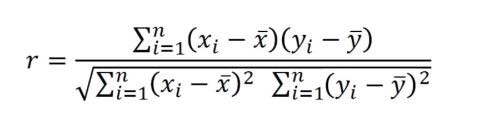

In [16]:
# Restar la mitja a cada element
def elementsMenysMitja(array):
    elementsMenysMitja = []
    for item in array:        
        mitja = np.mean(item)        
        aux2 = []
        for element in item:            
            aux2.append(element-mitja)
        elementsMenysMitja.append(aux2)  
    
    return elementsMenysMitja

# Càlcul covariança
def covManual(array):
        
    elementsMenysMitjaTrasposat = np.transpose(elementsMenysMitja(array))
    
    sum = 0
    
    for item in elementsMenysMitjaTrasposat:
        result = 1
        for element in item:            
            result *= element        
        
        sum += result        
        
    return sum / len(array[0])

# Càlcul correlació
def corrManual(array):
    
    # producte desviacions estàndar
    producte = 1
    for item in array:
        producte *= np.std(item)
        
    # la correlació és la covariança / producte desviacions
    return covManual(array) / producte
       

In [17]:
array = [[1,0,0,3,1], [3,6,6,2,9]]

print("Correlació calculada manualment:", corrManual(array))
print()
print("Correlació per funció de numpy:", np.corrcoef(array)[0][1])

Correlació calculada manualment: -0.5884898863364998

Correlació per funció de numpy: -0.5884898863364998


El coeficient de correlació, a l'igual que la covariança, indica la relació entre dues o més variables, amb la condició que siguin quantitatives i contínues. 

La covariança indica si les dues variables *varien* en la mateixa direcció (covariança positiva) o en la direcció oposada (covariança negativa). No importa el valor numèric de covariança, només el signe és útil.

Per la seva banda, la correlació explica quantitivament el canvi de proporció de la segona variable. La correlació varia entre 1 i -1 (es parla en aquests casos de relació lineal perfecta en cada signe), però quant més s'acosta a zero menys *força* té la relació. 

Per això amb la correlació es pot quantificar el que visualment s'aprecia amb els gràfics de dispersió.

Referències:

[Covarianza y correlación: comprendiendo su utilidad](https://sitiobigdata.com/2019/10/26/covarianza-y-correlacion/#)

[Article a la Wikipèdia](https://es.wikipedia.org/wiki/Coeficiente_de_correlaci%C3%B3n_de_Pearson)